In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy
import pandas as pd


In [2]:
base_dir = "FER2013"
train_dir = os.path.join(base_dir, r"C:\Users\avija\Downloads\FER2013\train")
test_dir = os.path.join(base_dir, r"C:\Users\avija\Downloads\FER2013\test")
print("train folder path", train_dir)
print("test folder path", test_dir)

train folder path C:\Users\avija\Downloads\FER2013\train
test folder path C:\Users\avija\Downloads\FER2013\test


In [3]:
classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
print("classes are found:", classes)

classes are found: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [4]:
for c in classes:
    img_count = len(os.listdir(os.path.join(train_dir, c)))
    print(f"{c}: {img_count} images")

angry: 3995 images
disgust: 436 images
fear: 4097 images
happy: 7215 images
neutral: 4965 images
sad: 4830 images
surprise: 3171 images


In [5]:
train_datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)


In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=64,
    shuffle=True,
    subset="training"
)

Found 22968 images belonging to 7 classes.


In [8]:
val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=64,
    shuffle=True,
    subset="validation"
)
    

Found 5741 images belonging to 7 classes.


In [9]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=64,
    shuffle=False
)

Found 7178 images belonging to 7 classes.


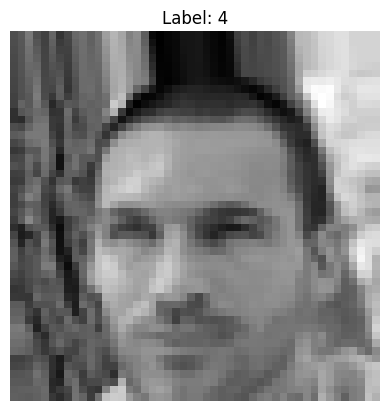

In [10]:
x_batch, y_batch = next(train_data)
plt.imshow(x_batch[0].reshape(48,48),cmap="gray")
plt.title(f"Label: {np.argmax(y_batch[0])}")
plt.axis("off")
plt.show()

In [13]:
base_dir = "FER2013"
music_csv = os.path.join(base_dir, r"C:\Users\avija\Downloads\FER2013\last.fm\Last.fm_data.csv")
print("File exists:", os.path.exists(music_csv))



File exists: True


In [14]:
music_df = pd.read_csv(music_csv)
print("Dataset loaded successfully!")
print("columns available:",music_df.columns)
print(music_df.head())


Dataset loaded successfully!
columns available: Index(['Unnamed: 0', 'Username', 'Artist', 'Track', 'Album', 'Date', 'Time'], dtype='object')
   Unnamed: 0 Username           Artist                          Track  \
0           0  Babs_05  Isobel Campbell     The Circus Is Leaving Town   
1           1  Babs_05  Isobel Campbell                   Dusty Wreath   
2           2  Babs_05  Isobel Campbell     Honey Child What Can I Do?   
3           3  Babs_05  Isobel Campbell  It's Hard To Kill A Bad Thing   
4           4  Babs_05  Isobel Campbell                Saturday's Gone   

                       Album         Date    Time  
0  Ballad of the Broken Seas  31 Jan 2021   23:36  
1  Ballad of the Broken Seas  31 Jan 2021   23:32  
2  Ballad of the Broken Seas  31 Jan 2021   23:28  
3  Ballad of the Broken Seas  31 Jan 2021   23:25  
4  Ballad of the Broken Seas  31 Jan 2021   23:21  


In [15]:

music_df = music_df.drop(columns=['Unnamed: 0', 'username', 'date', 'time'], errors='ignore')

print(music_df.head())


  Username           Artist                          Track  \
0  Babs_05  Isobel Campbell     The Circus Is Leaving Town   
1  Babs_05  Isobel Campbell                   Dusty Wreath   
2  Babs_05  Isobel Campbell     Honey Child What Can I Do?   
3  Babs_05  Isobel Campbell  It's Hard To Kill A Bad Thing   
4  Babs_05  Isobel Campbell                Saturday's Gone   

                       Album         Date    Time  
0  Ballad of the Broken Seas  31 Jan 2021   23:36  
1  Ballad of the Broken Seas  31 Jan 2021   23:32  
2  Ballad of the Broken Seas  31 Jan 2021   23:28  
3  Ballad of the Broken Seas  31 Jan 2021   23:25  
4  Ballad of the Broken Seas  31 Jan 2021   23:21  


In [16]:

print(music_df.isnull().sum())


music_df = music_df.dropna(subset=['Track', 'Artist'])


Username     0
Artist       0
Track        0
Album       12
Date         0
Time         0
dtype: int64


In [17]:
music_df = music_df.drop_duplicates(subset=['Track', 'Artist'])

print("Dataset shape after cleaning:", music_df.shape)


Dataset shape after cleaning: (76038, 6)


In [18]:
music_df['Track'] = music_df['Track'].str.lower().str.strip()
music_df['Artist'] = music_df['Artist'].str.lower().str.strip()


In [19]:
def map_emotion(track, artist):
    track = str(track).lower()
    artist = str(artist).lower()

    
    if "love" in track or "happy" in track or "dance" in track:
        return "happy"
    elif "sad" in track or "cry" in track or "lonely" in track:
        return "sad"
    elif "rock" in track or "metal" in artist or "angry" in track:
        return "angry"
    elif "calm" in track or "chill" in track or "instrumental" in track:
        return "neutral"
    else:
        return "neutral"  # default


music_df['emotion'] = music_df.apply(lambda x: map_emotion(x['Track'], x['Artist']), axis=1)

print(music_df[['Track', 'Artist', 'emotion']].head(10))


                               Track           Artist  emotion
0         the circus is leaving town  isobel campbell  neutral
1                       dusty wreath  isobel campbell  neutral
2         honey child what can i do?  isobel campbell  neutral
3      it's hard to kill a bad thing  isobel campbell  neutral
4                    saturday's gone  isobel campbell  neutral
5  (do you wanna) come walk with me?  isobel campbell  neutral
6                       ramblin' man  isobel campbell  neutral
7                           revolver  isobel campbell  neutral
8          ballad of the broken seas  isobel campbell  neutral
9                  the false husband  isobel campbell  neutral


In [20]:
import random

def recommend_songs(emotion, n=5):
    # Filter dataset on detected emotion
    filtered = music_df[music_df['emotion'] == emotion]

    if filtered.empty:
        return ["No songs found for this emotion."]


    return filtered.sample(n=min(n, len(filtered)))[['Track', 'Artist']]


In [22]:

detected_emotion = "sad"

print(f"🎵 Recommended Songs for Emotion: {detected_emotion}")
print(recommend_songs(detected_emotion, n=5))


🎵 Recommended Songs for Emotion: sad
                          Track        Artist
55002         you should be sad        halsey
143612            big girls cry           sia
106290             lonely beast  eric cannata
13245       pretty when you cry  lana del rey
13730   owner of a lonely heart           yes
